## 机器学习策略——基于SVM回归算法预测股市收益率

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tushare as ts
import seaborn
%matplotlib inline

### 1. 数据获取

In [2]:
hs300 = ts.get_k_data('hs300', '2000-01-01', '2017-06-30')
hs300.set_index('date',inplace = True)
hs300.index = pd.to_datetime(hs300.index)    #因为要merge操作，要把date转换成日期格式；
hs300.head()

,open,close,high,low,volume,code
date,,,,,,
2005-04-08,984.66,1003.45,1003.70,979.53,14762500.0,hs300
2005-04-11,1003.88,995.42,1008.73,992.77,15936100.0,hs300
2005-04-12,993.71,978.70,993.71,978.20,10226200.0,hs300
2005-04-13,987.95,1000.90,1006.50,987.95,16071700.0,hs300
2005-04-14,1004.64,986.97,1006.42,985.58,12945700.0,hs300


In [3]:
hs300.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2973 entries, 2005-04-08 to 2017-06-30
Data columns (total 6 columns):
open      2973 non-null float64
close     2973 non-null float64
high      2973 non-null float64
low       2973 non-null float64
volume    2973 non-null float64
code      2973 non-null object
dtypes: float64(5), object(1)
memory usage: 162.6+ KB


In [4]:
hs300_close = hs300['close']

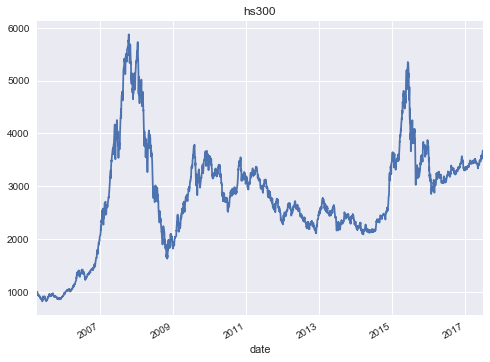

In [5]:
hs300.close.plot(figsize = (8,6),title = 'hs300')


### 2.特征工程处理 

In [6]:
for i in range(1, 21, 1):
    hs300['close - ' + str(i) + 'd'] = hs300['close'].shift(i)

In [11]:
hs300.head(21)

,open,close,high,low,volume,code,close - 1d,close - 2d,close - 3d,close - 4d,...,close - 11d,close - 12d,close - 13d,close - 14d,close - 15d,close - 16d,close - 17d,close - 18d,close - 19d,close - 20d
date,,,,,,,,,,,,,,,,,,,,,
2005-04-08,984.66,1003.45,1003.70,979.53,14762500.0,hs300,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-11,1003.88,995.42,1008.73,992.77,15936100.0,hs300,1003.45,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-12,993.71,978.70,993.71,978.20,10226200.0,hs300,995.42,1003.45,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-13,987.95,1000.90,1006.50,987.95,16071700.0,hs300,978.70,995.42,1003.45,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-14,1004.64,986.97,1006.42,985.58,12945700.0,hs300,1000.90,978.70,995.42,1003.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-15,982.61,974.08,982.61,971.93,10409000.0,hs300,986.97,1000.90,978.70,995.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-18,970.91,963.77,970.91,958.65,8598400.0,hs300,974.08,986.97,1000.90,978.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-19,962.92,965.89,968.87,957.91,9212620.0,hs300,963.77,974.08,986.97,1000.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-20,964.15,950.87,964.15,946.20,8850700.0,hs300,965.89,963.77,974.08,986.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
hs_20d = hs300[[x for x in hs300.columns if 'close' in x]].iloc[20:]

In [9]:
hs_20d.head()

,close,close - 1d,close - 2d,close - 3d,close - 4d,close - 5d,close - 6d,close - 7d,close - 8d,close - 9d,...,close - 11d,close - 12d,close - 13d,close - 14d,close - 15d,close - 16d,close - 17d,close - 18d,close - 19d,close - 20d
date,,,,,,,,,,,,,,,,,,,,,
2005-05-13,887.54,885.82,901.85,913.08,909.17,932.40,942.07,926.60,937.08,930.07,...,943.98,950.87,965.89,963.77,974.08,986.97,1000.90,978.70,995.42,1003.45
2005-05-16,875.27,887.54,885.82,901.85,913.08,909.17,932.40,942.07,926.60,937.08,...,939.10,943.98,950.87,965.89,963.77,974.08,986.97,1000.90,978.70,995.42
2005-05-17,881.46,875.27,887.54,885.82,901.85,913.08,909.17,932.40,942.07,926.60,...,930.07,939.10,943.98,950.87,965.89,963.77,974.08,986.97,1000.90,978.70
2005-05-18,883.20,881.46,875.27,887.54,885.82,901.85,913.08,909.17,932.40,942.07,...,937.08,930.07,939.10,943.98,950.87,965.89,963.77,974.08,986.97,1000.90
2005-05-19,884.17,883.20,881.46,875.27,887.54,885.82,901.85,913.08,909.17,932.40,...,926.60,937.08,930.07,939.10,943.98,950.87,965.89,963.77,974.08,986.97


In [12]:
hs_20d = hs_20d.iloc[:,::-1]                #转换特征的顺序；

In [13]:
hs_20d.head()

,close - 20d,close - 19d,close - 18d,close - 17d,close - 16d,close - 15d,close - 14d,close - 13d,close - 12d,close - 11d,...,close - 9d,close - 8d,close - 7d,close - 6d,close - 5d,close - 4d,close - 3d,close - 2d,close - 1d,close
date,,,,,,,,,,,,,,,,,,,,,
2005-05-13,1003.45,995.42,978.70,1000.90,986.97,974.08,963.77,965.89,950.87,943.98,...,930.07,937.08,926.60,942.07,932.40,909.17,913.08,901.85,885.82,887.54
2005-05-16,995.42,978.70,1000.90,986.97,974.08,963.77,965.89,950.87,943.98,939.10,...,937.08,926.60,942.07,932.40,909.17,913.08,901.85,885.82,887.54,875.27
2005-05-17,978.70,1000.90,986.97,974.08,963.77,965.89,950.87,943.98,939.10,930.07,...,926.60,942.07,932.40,909.17,913.08,901.85,885.82,887.54,875.27,881.46
2005-05-18,1000.90,986.97,974.08,963.77,965.89,950.87,943.98,939.10,930.07,937.08,...,942.07,932.40,909.17,913.08,901.85,885.82,887.54,875.27,881.46,883.20
2005-05-19,986.97,974.08,963.77,965.89,950.87,943.98,939.10,930.07,937.08,926.60,...,932.40,909.17,913.08,901.85,885.82,887.54,875.27,881.46,883.20,884.17


### 3. 测试集表现

In [14]:
from sklearn import svm

In [15]:
clf = svm.SVR(kernel='linear')

#### 3.1 生成训练集和测试集 

In [17]:
features_train = hs_20d[:2000]
features_train.head()

,close - 20d,close - 19d,close - 18d,close - 17d,close - 16d,close - 15d,close - 14d,close - 13d,close - 12d,close - 11d,...,close - 9d,close - 8d,close - 7d,close - 6d,close - 5d,close - 4d,close - 3d,close - 2d,close - 1d,close
date,,,,,,,,,,,,,,,,,,,,,
2005-05-13,1003.45,995.42,978.70,1000.90,986.97,974.08,963.77,965.89,950.87,943.98,...,930.07,937.08,926.60,942.07,932.40,909.17,913.08,901.85,885.82,887.54
2005-05-16,995.42,978.70,1000.90,986.97,974.08,963.77,965.89,950.87,943.98,939.10,...,937.08,926.60,942.07,932.40,909.17,913.08,901.85,885.82,887.54,875.27
2005-05-17,978.70,1000.90,986.97,974.08,963.77,965.89,950.87,943.98,939.10,930.07,...,926.60,942.07,932.40,909.17,913.08,901.85,885.82,887.54,875.27,881.46
2005-05-18,1000.90,986.97,974.08,963.77,965.89,950.87,943.98,939.10,930.07,937.08,...,942.07,932.40,909.17,913.08,901.85,885.82,887.54,875.27,881.46,883.20
2005-05-19,986.97,974.08,963.77,965.89,950.87,943.98,939.10,930.07,937.08,926.60,...,932.40,909.17,913.08,901.85,885.82,887.54,875.27,881.46,883.20,884.17


In [16]:
labels_train = hs_20d['close'].shift(-1)[:2000]     #回归问题的标签就是预测的就是股价，下一天的收盘价就是前一天的标签；
labels_train.head()

date
2005-05-13    875.27
2005-05-16    881.46
2005-05-17    883.20
2005-05-18    884.17
2005-05-19    882.76
Name: close, dtype: float64

In [18]:
features_test = hs_20d[2000:]
features_test.head()

,close - 20d,close - 19d,close - 18d,close - 17d,close - 16d,close - 15d,close - 14d,close - 13d,close - 12d,close - 11d,...,close - 9d,close - 8d,close - 7d,close - 6d,close - 5d,close - 4d,close - 3d,close - 2d,close - 1d,close
date,,,,,,,,,,,,,,,,,,,,,
2013-08-02,2226.85,2163.62,2162.67,2224.06,2326.69,2275.37,2307.30,2317.85,2282.84,2245.33,...,2202.19,2265.84,2249.15,2237.68,2224.01,2175.97,2189.39,2193.02,2245.36,2247.26
2013-08-05,2163.62,2162.67,2224.06,2326.69,2275.37,2307.30,2317.85,2282.84,2245.33,2190.48,...,2265.84,2249.15,2237.68,2224.01,2175.97,2189.39,2193.02,2245.36,2247.26,2278.33
2013-08-06,2162.67,2224.06,2326.69,2275.37,2307.30,2317.85,2282.84,2245.33,2190.48,2202.19,...,2249.15,2237.68,2224.01,2175.97,2189.39,2193.02,2245.36,2247.26,2278.33,2293.64
2013-08-07,2224.06,2326.69,2275.37,2307.30,2317.85,2282.84,2245.33,2190.48,2202.19,2265.84,...,2237.68,2224.01,2175.97,2189.39,2193.02,2245.36,2247.26,2278.33,2293.64,2280.62
2013-08-08,2326.69,2275.37,2307.30,2317.85,2282.84,2245.33,2190.48,2202.19,2265.84,2249.15,...,2224.01,2175.97,2189.39,2193.02,2245.36,2247.26,2278.33,2293.64,2280.62,2276.78


In [19]:
labels_test = hs_20d['close'].shift(-1)[2000:]
labels_test.head()

date
2013-08-02    2278.33
2013-08-05    2293.64
2013-08-06    2280.62
2013-08-07    2276.78
2013-08-08    2286.01
Name: close, dtype: float64

#### 3.2 模型训练

In [20]:
clf.fit(features_train, labels_train)     #模型的训练过程；

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [21]:
predict = clf.predict(features_test)      #给你测试集的特征，返回的是测试集的标签，回归问题的标签就是股价；

In [23]:
predict[:50]

array([ 2295.94957929,  2266.74641961,  2339.05687168,  2317.73540996,
        2278.25592248,  2268.53568548,  2302.31321974,  2349.04212936,
        2374.61616344,  2338.69833084,  2329.37140659,  2385.24722633,
        2312.39808823,  2286.70069848,  2291.8317848 ,  2325.36686415,
        2404.21864456,  2385.9008463 ,  2328.99602078,  2318.78910451,
        2300.78470445,  2339.45517518,  2407.82566487,  2344.10428356,
        2343.54950834,  2361.91673129,  2455.53369592,  2518.17030235,
        2475.49611557,  2483.53614217,  2483.71145578,  2501.24305496,
        2471.39324995,  2429.51463051,  2488.2866583 ,  2461.79135455,
        2463.59874238,  2409.70201522,  2438.96996977,  2478.78903853,
        2445.20970793,  2420.46518114,  2438.72293273,  2507.46514459,
        2522.21882712,  2494.98425049,  2407.79090387,  2383.47293009,
        2416.33834684,  2501.32391207])

In [24]:
df = pd.DataFrame(labels_test)

In [26]:
df['predict'] = predict     #把前面预测的测试集的股价给添加到DataFrame中；
df = df.rename(columns = {'close': 'Next Close', 'predict':'Predict Next Close'})

In [27]:
df.head()

,Next Close,Predict Next Close
date,,
2013-08-02,2278.33,2295.949579
2013-08-05,2293.64,2266.746420
2013-08-06,2280.62,2339.056872
2013-08-07,2276.78,2317.735410
2013-08-08,2286.01,2278.255922


In [28]:
current_close = hs_20d[['close']].iloc[2000:]
current_close.head()

,close
date,
2013-08-02,2247.26
2013-08-05,2278.33
2013-08-06,2293.64
2013-08-07,2280.62
2013-08-08,2276.78


In [31]:
next_open = hs300[['open']].iloc[2020:].shift(-1)    #把8月3号的开盘价放到了8月2号的位置；
next_open.head()

,open
date,
2013-08-02,2249.98
2013-08-05,2270.67
2013-08-06,2292.38
2013-08-07,2277.25
2013-08-08,2288.51


In [33]:
df1 = pd.merge(df, current_close, left_index=True, right_index=True)
df1.head()

,Next Close,Predict Next Close,close
date,,,
2013-08-02,2278.33,2295.949579,2247.26
2013-08-05,2293.64,2266.746420,2278.33
2013-08-06,2280.62,2339.056872,2293.64
2013-08-07,2276.78,2317.735410,2280.62
2013-08-08,2286.01,2278.255922,2276.78


In [34]:
df2 = pd.merge(df1, next_open, left_index=True, right_index=True)

In [35]:
df2.head()

,Next Close,Predict Next Close,close,open
date,,,,
2013-08-02,2278.33,2295.949579,2247.26,2249.98
2013-08-05,2293.64,2266.746420,2278.33,2270.67
2013-08-06,2280.62,2339.056872,2293.64,2292.38
2013-08-07,2276.78,2317.735410,2280.62,2277.25
2013-08-08,2286.01,2278.255922,2276.78,2288.51


In [36]:
df2.columns = ['Next Close', 'Predicted Next Close', 'Current Close', 'Next Open']

In [37]:
df2.head()

,Next Close,Predicted Next Close,Current Close,Next Open
date,,,,
2013-08-02,2278.33,2295.949579,2247.26,2249.98
2013-08-05,2293.64,2266.746420,2278.33,2270.67
2013-08-06,2280.62,2339.056872,2293.64,2292.38
2013-08-07,2276.78,2317.735410,2280.62,2277.25
2013-08-08,2286.01,2278.255922,2276.78,2288.51


#### 3.3 模型逻辑

In [38]:
df2['Signal'] = np.where(df2['Predicted Next Close'] > df2['Next Open'] + 5,1,0)

#### 3.4 模型收益计算和可视化

In [42]:
df2['PL'] =  np.where(df2['Signal'] == 1,(df2['Next Close'] - df2['Next Open'])/df2['Next Open'],0)

In [43]:
df2.head()

,Next Close,Predicted Next Close,Current Close,Next Open,Signal,PL
date,,,,,,
2013-08-02,2278.33,2295.949579,2247.26,2249.98,1,0.012600
2013-08-05,2293.64,2266.746420,2278.33,2270.67,0,0.000000
2013-08-06,2280.62,2339.056872,2293.64,2292.38,1,-0.005130
2013-08-07,2276.78,2317.735410,2280.62,2277.25,1,-0.000206
2013-08-08,2286.01,2278.255922,2276.78,2288.51,0,0.000000


In [48]:
df2['Strategy'] = (df2['PL'].shift(1)+1).cumprod()
df2['return'] = (df2['Next Close'].pct_change()+1).cumprod()

In [49]:
df2.head()

,Next Close,Predicted Next Close,Current Close,Next Open,Signal,PL,Strategy,return
date,,,,,,,,
2013-08-02,2278.33,2295.949579,2247.26,2249.98,1,0.012600,1.012600,NaN
2013-08-05,2293.64,2266.746420,2278.33,2270.67,0,0.000000,1.012600,1.006720
2013-08-06,2280.62,2339.056872,2293.64,2292.38,1,-0.005130,1.007405,1.001005
2013-08-07,2276.78,2317.735410,2280.62,2277.25,1,-0.000206,1.007198,0.999320
2013-08-08,2286.01,2278.255922,2276.78,2288.51,0,0.000000,1.007198,1.003371


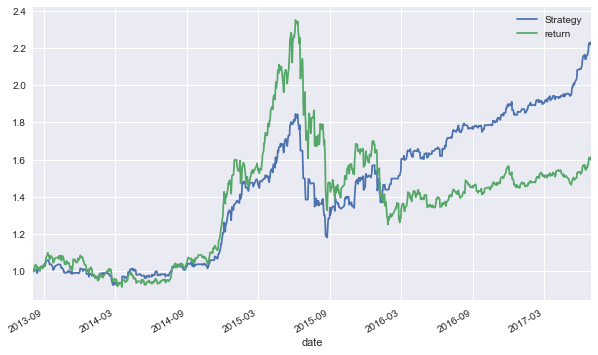

In [50]:
df2[['Strategy','return']].dropna().plot(figsize=(10, 6))

### 4. 训练集数据

In [51]:
predict_train = clf.predict(features_train)

In [52]:
df_train = pd.DataFrame(labels_train)
df_train['predict'] = predict_train
df_train = df_train.rename(columns = {'close': 'Next Close', 'predict':'Predict Next Close'})

In [53]:
df_train.head()

,Next Close,Predict Next Close
date,,
2005-05-13,875.27,886.984068
2005-05-16,881.46,851.728220
2005-05-17,883.20,878.231552
2005-05-18,884.17,892.458563
2005-05-19,882.76,870.889383


In [56]:
current_close_train = hs_20d[['close']].iloc[:2000]
current_close_train.head()

,close
date,
2005-05-13,887.54
2005-05-16,875.27
2005-05-17,881.46
2005-05-18,883.20
2005-05-19,884.17


In [57]:
next_open_train = hs300[['open']].iloc[20:2020].shift(-1)
next_open_train.head()

,open
date,
2005-05-13,885.39
2005-05-16,873.08
2005-05-17,881.14
2005-05-18,882.84
2005-05-19,883.51


In [58]:
df1_train = pd.merge(df_train, current_close_train, left_index=True, right_index=True)
df2_train = pd.merge(df1_train, next_open_train, left_index=True, right_index=True)
df2_train.columns = ['Next Close', 'Predicted Next Close', 'Current Close', 'Next Open']

In [59]:
df2_train.head()

,Next Close,Predicted Next Close,Current Close,Next Open
date,,,,
2005-05-13,875.27,886.984068,887.54,885.39
2005-05-16,881.46,851.728220,875.27,873.08
2005-05-17,883.20,878.231552,881.46,881.14
2005-05-18,884.17,892.458563,883.20,882.84
2005-05-19,882.76,870.889383,884.17,883.51


In [60]:
df2_train ['Signal'] = np.where(df2_train ['Predicted Next Close'] > df2_train ['Next Open'] + 5,1,0)
df2_train ['PL'] =  np.where(df2_train ['Signal'] == 1,(df2_train ['Next Close'] - df2_train ['Next Open'])/df2_train ['Next Open'],0)

In [61]:
df2_train['Strategy'] = (df2_train['PL'].shift(1)+1).cumprod()
df2_train['return'] = (df2_train['Next Close'].pct_change()+1).cumprod()

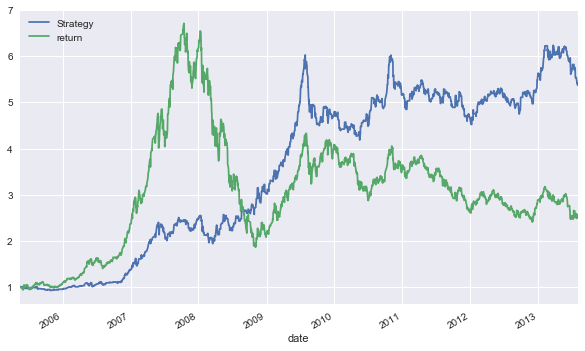

In [62]:
df2_train[['Strategy','return']].dropna().plot(figsize=(10, 6))

声明：本资料仅供内部学习交流使用，切勿外传。